In [1]:
# Linear algebra and tabular data libraries

import pandas as pd
import numpy as np

# Audio handling libraries

from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav

# Visualization library and color maps for visualization

import matplotlib.pyplot as plt
from matplotlib import cm

# OS file handling

import os

# Progress bar for code

from tqdm import tqdm

## Building the dataset

In [2]:
# lists to be exported

wav_files = []
labels = []

for keyword_dir in tqdm(os.listdir("speech_commands")):
    for file in os.listdir(f"speech_commands/{keyword_dir}"):
        
        # Select only audio wav files
        
        if file.endswith(".wav"):
            
            # Read wav file and store flattened mfcc
            (rate,sig) = wav.read(f"speech_commands/{keyword_dir}/{file}")
            mfcc_feat = mfcc(sig,rate)
            wav_files.append(mfcc_feat)
            
            # Store label
            labels.append(keyword_dir)

100%|██████████| 35/35 [04:38<00:00,  7.96s/it]


In [4]:
# Inspect size


np.array(wav_files, dtype='object').shape

(105829,)

## Preparing for export

In [19]:
# Lookup longest wav file

longest_wav = len(max(wav_files, key=len))

In [20]:
# Add padding to make all audio same length

for idx, blimg in tqdm(enumerate(wav_files)):
    padding_length = longest_wav - len(blimg)
    if padding_length > 0:
        wav_files[idx] = np.concatenate((blimg, np.zeros((padding_length, 13))), axis=0)

105829it [00:00, 847050.45it/s]


In [26]:
# Save all files as npy files

wav_files_np = np.array(wav_files, dtype='object')
wav_files_np = wav_files_np.astype('float32')

labels_np = np.array(labels, dtype='object')

## Visualisation - not related to data loading

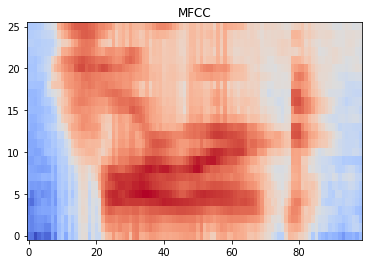

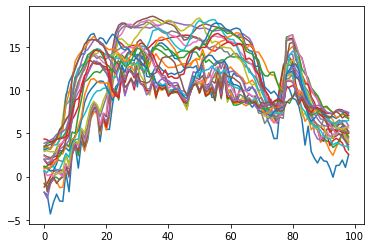

In [36]:
(rate,sig) = wav.read("speech_commands/forward/0a2b400e_nohash_0.wav")
# mfcc_feat = mfcc(sig,rate)
mfcc_feat = logfbank(sig,rate)

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()